In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# @njit
def compute_tetration_divergence(x0, y0, x1, y1, width, height, max_iter = 500, escape_radius = 1e+10):
	x = np.linspace(x0, x1, width)
	y = np.linspace(y0, y1, height)
	c = x[:, None] + 1j * y[None, :]
	z = c
	divergence_map = np.zeros((width, height), dtype=bool)
	last = np.zeros((width, height), dtype=bool)
	changed = np.zeros((width, height), dtype=int)

	for i in range(max_iter):
		powered = c ** z
		z = powered
		divergence_map |= (np.abs(z) > escape_radius)

		changed[np.bitwise_xor(divergence_map, last)] = (i+1)
		last = divergence_map.copy()

	return divergence_map, changed

In [3]:
%matplotlib inline

C:\Users\th070\AppData\Local\Temp\ipykernel_8216\4202129282.py:12: RuntimeWarning: overflow encountered in power
  powered = c ** z
C:\Users\th070\AppData\Local\Temp\ipykernel_8216\4202129282.py:12: RuntimeWarning: invalid value encountered in power
  powered = c ** z


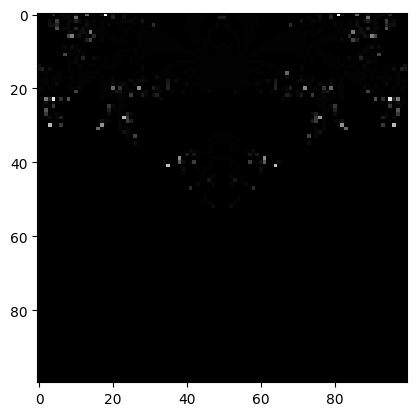

In [4]:
dmap, changed = compute_tetration_divergence(-1,-1,1,1,100,100)
plt.imshow(changed,cmap='gray')

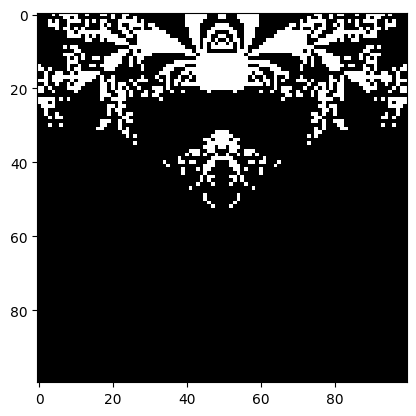

In [5]:
plt.imshow(dmap, cmap='gray')

In [6]:
changed.shape, changed.dtype

((100, 100), dtype('int32'))

In [7]:
%matplotlib widget

C:\Users\th070\AppData\Local\Temp\ipykernel_8216\4202129282.py:12: RuntimeWarning: overflow encountered in power
  powered = c ** z
C:\Users\th070\AppData\Local\Temp\ipykernel_8216\4202129282.py:12: RuntimeWarning: invalid value encountered in power
  powered = c ** z


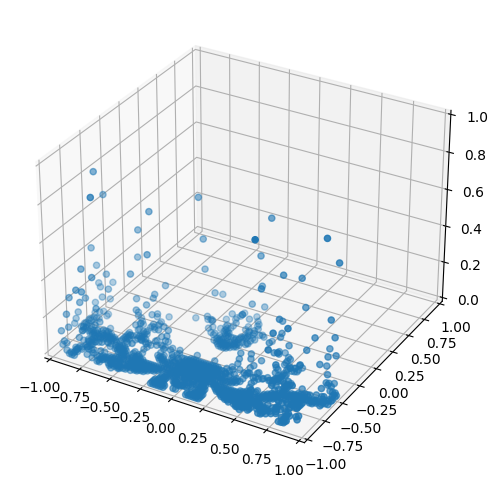

In [14]:
x0, y0 = (-1, -1)
x1, y1 = (1, 1)
width, height = (100, 100)

dmap, changed = compute_tetration_divergence(x0,y0,x1,y1,width,height)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])

xx = np.linspace(x0, x1, width)
yy = np.linspace(y0, y1, height)

x = np.array([xx for _ in range(height)])
y = np.array([[i for _ in range(width)] for i in yy])
# print(y, len(y))
# z = changed
# z = [0 for _ in range(width * height)]
z = changed.flatten()

i = 0
for _ in range(width * height):
	if z[i] == 0:
		x = np.delete(x, i)
		y = np.delete(y, i)
		z = np.delete(z, i)
	else:
		i+=1

ax.scatter(x,y,z/500)

plt.show()

In [9]:
# @njit
def compute_tetration_divergence_changedList(x0, y0, x1, y1, width, height, max_iter = 500, escape_radius = 1e+10):
	x = np.linspace(x0, x1, width)
	y = np.linspace(y0, y1, height)
	c = x[:, None] + 1j * y[None, :]
	z = c
	divergence_map = np.zeros((width, height), dtype=bool)
	last = np.zeros((width, height), dtype=bool)
	changedList = []

	for _ in range(max_iter):
		powered = c ** z
		z = powered
		divergence_map |= (np.abs(z) > escape_radius)

		changedList.append(np.bitwise_xor(divergence_map, last))
		last = divergence_map.copy()

	return divergence_map, changedList

In [10]:
dmap, changedList = compute_tetration_divergence_changedList(x0,y0,x1,y1,width,height)

C:\Users\th070\AppData\Local\Temp\ipykernel_8216\2268856656.py:12: RuntimeWarning: overflow encountered in power
  powered = c ** z
C:\Users\th070\AppData\Local\Temp\ipykernel_8216\2268856656.py:12: RuntimeWarning: invalid value encountered in power
  powered = c ** z


In [11]:
%matplotlib inline

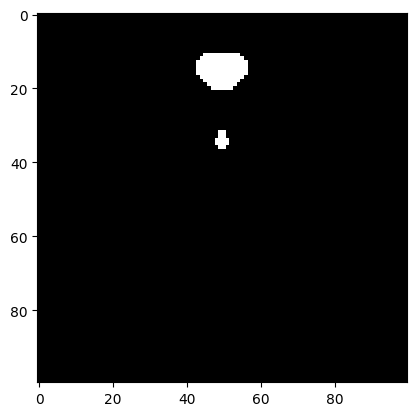

In [12]:
plt.imshow(changedList[2], cmap='gray')